In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate fake signal
Components:
- signal: sine with 0.1hz frequency
- scaling factor for amplitude so it's not constant
- random noise

In [35]:
x = np.linspace(0, 2, 1001)

In [38]:
def signal(x, freq=0.1, phase=0):
    x = np.sin(x*2*np.pi/freq + phase) * (2 - x/(x[-1]-x[0]) ) + np.random.normal(scale=freq, size=len(x))
    return x

def noise(x, scale=0.1):
    return np.random.normal(scale=scale, size=len(x))

We generate sine signal interrupted with constant noise

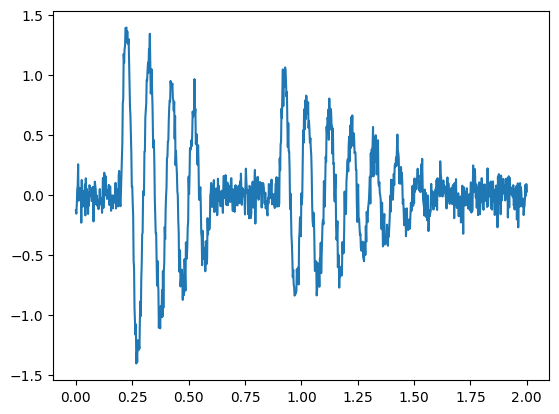

In [134]:
y = np.concatenate([noise(x[:100]), signal(x[100:300]), noise(x[300:450]), signal(x[450:870]), noise(x[870:])])
plt.plot(x, y)

### Split timeseries into signal and noise

This assumes that what we want to remove is a "constant" signal that never exceeds a given y-value. Otherwise it won't work.
The code traverses the timeseries in windows, and if all points within a window are within the cutoff, it labels the data as noise.
Parameters:
- x
- y
- cutoff: y-value which noise does not exceed
- window_size: this should be smaller than any "gap", but larger than frequency/2 (so, larger than 0.05)

In [178]:
def remove_noise(x, y, cutoff=0.4, window_size=0.1):
    
    noise_index = set()

    dx = x[1] - x[0]
    window_points = int(window_size/dx)
    stop_index = len(x) - window_points

    for index in range(0, stop_index):
        window = range(index, index+window_points)

        if np.all(np.abs(y[window]) < cutoff):
            noise_index = noise_index | set(window)

    signal_index = set(range(0, len(x))) - noise_index
    return list(signal_index), list(noise_index)

In [179]:
signal_index, noise_index = remove_noise(x, y)

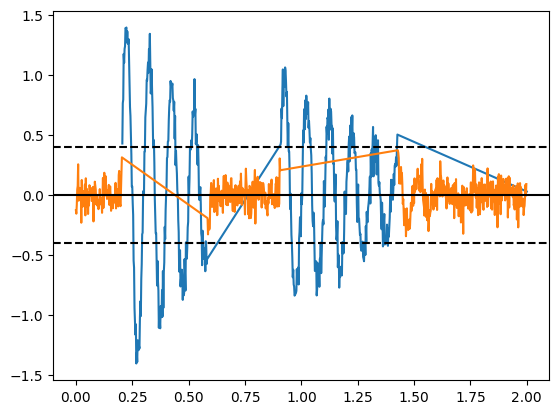

In [186]:
plt.plot(x[signal_index], y[signal_index])
plt.plot(x[noise_index], y[noise_index])
plt.axhline(0, color="k")
plt.axhline(0.4, color="k", ls="--")
plt.axhline(-0.4, color="k", ls="--")